In [1]:
from pandas import read_csv
import numpy 
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score
import random
import pylab as pl
import csv

/home/user/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
series = read_csv('newmonthlycopy.csv')
X = series.values
print(series.columns)
print(series)
print(series.describe())

Index(['Month', 'Fuel Oil Consumption',
       'Asphalt and Road Oil Product Supplied',
       'Cooling Degree Days U.S. Average',
       'Heating Degree Days U.S. Average '],
      dtype='object')
       Month  Fuel Oil Consumption  Asphalt and Road Oil Product Supplied  \
0    2000-01                  0.82                                   0.24   
1    2000-02                  0.81                                   0.33   
2    2000-03                  0.56                                   0.38   
3    2000-04                  0.46                                   0.44   
4    2000-05                  0.40                                   0.64   
5    2000-06                  0.37                                   0.74   
6    2000-07                  0.32                                   0.70   
7    2000-08                  0.40                                   0.81   
8    2000-09                  0.44                                   0.71   
9    2000-10                  0.

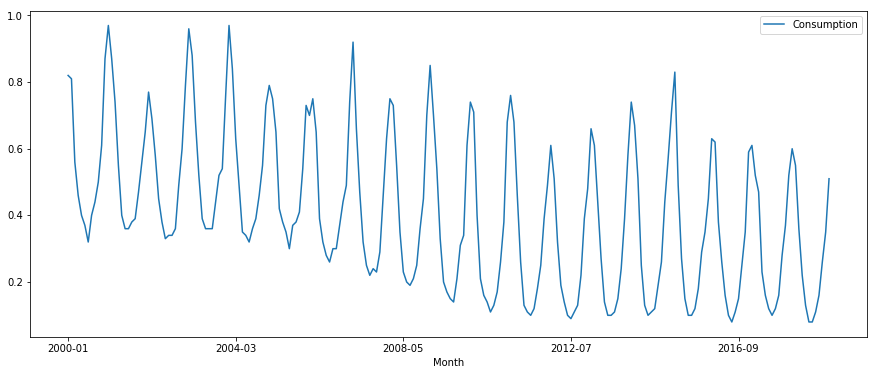

In [3]:
series.plot(x='Month',y='Fuel Oil Consumption',label='Consumption')
#series.plot(x='Month',y='Asphalt and Road Oil Product Supplied',label='Production')
#series.plot(x='Month',y='Cooling Degree Days U.S. Average',label='Climate-Cooling Degree Days')
#series.plot(x='Month',y='Heating Degree Days U.S. Average',label='Climate-Heating Degree Days')
pyplot.show(block=False)

In [4]:
X=series['Month'].values
print(X)

array(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06',
       '2000-07', '2000-08', '2000-09', '2000-10', '2000-11', '2000-12',
       '2001-01', '2001-02', '2001-03', '2001-04', '2001-05', '2001-06',
       '2001-07', '2001-08', '2001-09', '2001-10', '2001-11', '2001-12',
       '2002-01', '2002-02', '2002-03', '2002-04', '2002-05', '2002-06',
       '2002-07', '2002-08', '2002-09', '2002-10', '2002-11', '2002-12',
       '2003-01', '2003-02', '2003-03', '2003-04', '2003-05', '2003-06',
       '2003-07', '2003-08', '2003-09', '2003-10', '2003-11', '2003-12',
       '2004-01', '2004-02', '2004-03', '2004-04', '2004-05', '2004-06',
       '2004-07', '2004-08', '2004-09', '2004-10', '2004-11', '2004-12',
       '2005-01', '2005-02', '2005-03', '2005-04', '2005-05', '2005-06',
       '2005-07', '2005-08', '2005-09', '2005-10', '2005-11', '2005-12',
       '2006-01', '2006-02', '2006-03', '2006-04', '2006-05', '2006-06',
       '2006-07', '2006-08', '2006-09', '2006-10', 

In [5]:
X=series['Fuel Oil Consumption'].values
print(X)

[ 0.82  0.81  0.56  0.46  0.4   0.37  0.32  0.4   0.44  0.5   0.61  0.87
  0.97  0.87  0.74  0.55  0.4   0.36  0.36  0.38  0.39  0.47  0.56  0.65
  0.77  0.69  0.58  0.45  0.38  0.33  0.34  0.34  0.36  0.49  0.6   0.79
  0.96  0.88  0.68  0.52  0.39  0.36  0.36  0.36  0.44  0.52  0.54  0.76
  0.97  0.84  0.63  0.49  0.35  0.34  0.32  0.36  0.39  0.46  0.55  0.73
  0.79  0.75  0.65  0.42  0.38  0.35  0.3   0.37  0.38  0.41  0.54  0.73
  0.7   0.75  0.65  0.39  0.32  0.28  0.26  0.3   0.3   0.37  0.44  0.49
  0.74  0.92  0.66  0.47  0.32  0.25  0.22  0.24  0.23  0.29  0.46  0.63
  0.75  0.73  0.55  0.35  0.23  0.2   0.19  0.21  0.25  0.36  0.45  0.7
  0.85  0.7   0.54  0.33  0.2   0.17  0.15  0.14  0.21  0.31  0.34  0.61
  0.74  0.71  0.4   0.21  0.16  0.14  0.11  0.13  0.17  0.26  0.38  0.68
  0.76  0.68  0.46  0.26  0.13  0.11  0.1   0.12  0.18  0.25  0.39  0.49
  0.61  0.51  0.32  0.19  0.14  0.1   0.09  0.11  0.13  0.22  0.39  0.48
  0.66  0.61  0.44  0.27  0.14  0.1   0.1   0.11  0.

In [6]:
Month1 = series['Month'].values
i=0
pred=list()
for j in range(16):
    X = series['Fuel Oil Consumption'].values
    n=list()
    n=X[i:48+i]
    print(n)
    size = int(len(n) * 0.77)
    train,test = X[0+i:size+i],X[size+i:len(n)+i]
    print(train)
    print(test)
    i=i+12
    # create a differenced series
    def difference(train, interval=1):
        diff = list()
        for k in range(interval, len(train)):
            value = train[i] - train[i - interval]
            diff.append(value)
            return diff
    # invert differenced value
    def inverse_difference(history, yhat, interval=1):
        return yhat + history[-interval]
    history = [x for x in train]
    predictions = list()
    expected=list()
    for t in range(len(test)):
        #Month2=series['Month'].values[36+i:len(n)]
        model = ARIMA(history, order=(2,0,0))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0]
        obs = test[t]
        expected.append(obs)
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs)) 
        pred.append(yhat[0])

[ 0.82  0.81  0.56  0.46  0.4   0.37  0.32  0.4   0.44  0.5   0.61  0.87
  0.97  0.87  0.74  0.55  0.4   0.36  0.36  0.38  0.39  0.47  0.56  0.65
  0.77  0.69  0.58  0.45  0.38  0.33  0.34  0.34  0.36  0.49  0.6   0.79
  0.96  0.88  0.68  0.52  0.39  0.36  0.36  0.36  0.44  0.52  0.54  0.76]
[ 0.82  0.81  0.56  0.46  0.4   0.37  0.32  0.4   0.44  0.5   0.61  0.87
  0.97  0.87  0.74  0.55  0.4   0.36  0.36  0.38  0.39  0.47  0.56  0.65
  0.77  0.69  0.58  0.45  0.38  0.33  0.34  0.34  0.36  0.49  0.6   0.79]
[ 0.96  0.88  0.68  0.52  0.39  0.36  0.36  0.36  0.44  0.52  0.54  0.76]
predicted=0.868649, expected=0.960000
predicted=0.984499, expected=0.880000
predicted=0.711733, expected=0.680000
predicted=0.473360, expected=0.520000
predicted=0.401823, expected=0.390000
predicted=0.335818, expected=0.360000
predicted=0.396274, expected=0.360000
predicted=0.418477, expected=0.360000
predicted=0.415778, expected=0.440000
predicted=0.535792, expected=0.520000
predicted=0.590626, expected=0.54

predicted=0.372965, expected=0.380000
predicted=0.476097, expected=0.680000
[ 0.75  0.73  0.55  0.35  0.23  0.2   0.19  0.21  0.25  0.36  0.45  0.7
  0.85  0.7   0.54  0.33  0.2   0.17  0.15  0.14  0.21  0.31  0.34  0.61
  0.74  0.71  0.4   0.21  0.16  0.14  0.11  0.13  0.17  0.26  0.38  0.68
  0.76  0.68  0.46  0.26  0.13  0.11  0.1   0.12  0.18  0.25  0.39  0.49]
[ 0.75  0.73  0.55  0.35  0.23  0.2   0.19  0.21  0.25  0.36  0.45  0.7
  0.85  0.7   0.54  0.33  0.2   0.17  0.15  0.14  0.21  0.31  0.34  0.61
  0.74  0.71  0.4   0.21  0.16  0.14  0.11  0.13  0.17  0.26  0.38  0.68]
[ 0.76  0.68  0.46  0.26  0.13  0.11  0.1   0.12  0.18  0.25  0.39  0.49]
predicted=0.831380, expected=0.760000
predicted=0.701952, expected=0.680000
predicted=0.519651, expected=0.460000
predicted=0.255975, expected=0.260000
predicted=0.140681, expected=0.130000
predicted=0.110711, expected=0.110000
predicted=0.186276, expected=0.100000
predicted=0.182578, expected=0.120000
predicted=0.216489, expected=0.1800

/home/user/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/user/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.139688, expected=0.100000
predicted=0.128673, expected=0.080000
predicted=0.144019, expected=0.110000
predicted=0.202039, expected=0.150000
predicted=0.234924, expected=0.250000
predicted=0.351599, expected=0.350000
predicted=0.420644, expected=0.590000
[ 0.74  0.67  0.51  0.25  0.13  0.1   0.11  0.12  0.19  0.26  0.44  0.57
  0.71  0.83  0.49  0.27  0.15  0.1   0.1   0.12  0.18  0.29  0.35  0.45
  0.63  0.62  0.38  0.26  0.16  0.1   0.08  0.11  0.15  0.25  0.35  0.59
  0.61  0.52  0.47  0.23  0.16  0.12  0.1   0.12  0.16  0.28  0.37  0.52]
[ 0.74  0.67  0.51  0.25  0.13  0.1   0.11  0.12  0.19  0.26  0.44  0.57
  0.71  0.83  0.49  0.27  0.15  0.1   0.1   0.12  0.18  0.29  0.35  0.45
  0.63  0.62  0.38  0.26  0.16  0.1   0.08  0.11  0.15  0.25  0.35  0.59]
[ 0.61  0.52  0.47  0.23  0.16  0.12  0.1   0.12  0.16  0.28  0.37  0.52]
predicted=0.700509, expected=0.610000
predicted=0.539161, expected=0.520000
predicted=0.393533, expected=0.470000
predicted=0.394400, expected=0.23

In [7]:
print(pred)

[0.86864888813239582, 0.98449873651577402, 0.71173320618350333, 0.47335977401939733, 0.4018231706011528, 0.33581813011744688, 0.39627405096507407, 0.41847672014666998, 0.41577791300427336, 0.53579156019152285, 0.5906255252944399, 0.55574743422776973, 0.89462382300667742, 1.0498692705333181, 0.64026718398684968, 0.42859146952361393, 0.39687704298939031, 0.29786565800758269, 0.40024399667389876, 0.37395068064912934, 0.44994290682187005, 0.45999452185584999, 0.54170916510591227, 0.62166343404747759, 0.81685198344913568, 0.7619041275949161, 0.6552426208096731, 0.53918014169931949, 0.27215496063289146, 0.403920079087147, 0.38914470859081196, 0.33525534458940442, 0.47757943507757838, 0.4338305669890819, 0.46894063644404638, 0.63708459783442861, 0.8234054249412176, 0.62588122715611405, 0.72746177163001224, 0.54422759646125196, 0.23714169106286298, 0.34151033000778053, 0.33322943926280113, 0.32940753547124146, 0.39912100414581542, 0.36388390091340883, 0.46422495821160892, 0.51291948739992987, 

228
192
<built-in method index of list object at 0x7f1294152ec8>


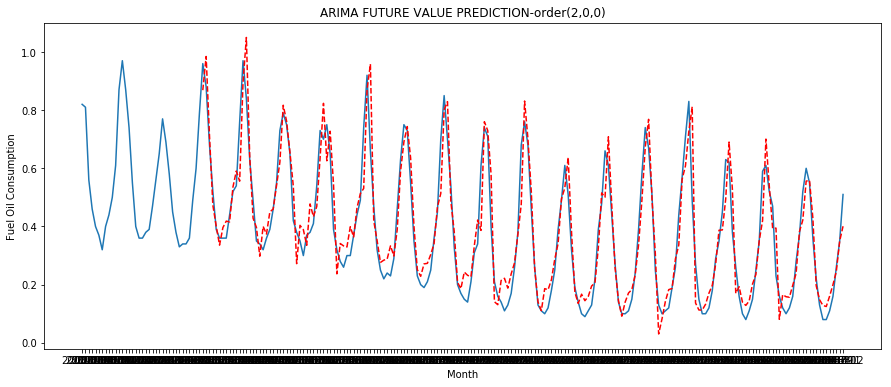

In [8]:
pyplot.title('ARIMA FUTURE VALUE PREDICTION-order(2,0,0)')
Month1 = series['Month'].values
#print(Month1)
Month2 = series['Month'].values[36:]
#print(Month2)
hist=series['Fuel Oil Consumption'].values
#Month3 = series['Month'].values
#Month4 = series['Month'].values[36:]
pyplot.plot(Month1,hist,label='Actual')
pyplot.plot(Month2,pred,'r--',label='Predicted')
#pyplot.plot(Month3,history1,label='Actual1')
#pyplot.plot(Month4,predictions1,'r--',label='Predicted1')
#print(pred)
print(len(hist))
print(len(pred))
print(pred.index)
pyplot.xlabel('Month')
pyplot.ylabel('Fuel Oil Consumption')
pyplot.show()
#pred.append(predictions)
# pyplot.plot(Month1,history,label='Actual')

In [9]:
with open("output2.csv", 'w') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    wr.writerow(pred)